# RIDGE REGRESSION USING GRADIENT DESCENT

In [290]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

In [291]:
X,y = load_diabetes(return_X_y=True)
data = load_diabetes()
df = pd.DataFrame(data = data['data'],columns=data['feature_names'])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [292]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_train.shape

(353, 10)

In [293]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [294]:
y_pred = LR.predict(X_test)
print(r2_score(y_test,y_pred))

0.4610882915687333


In [299]:
sgd = SGDRegressor(penalty='l2',loss='squared_error',max_iter=500,eta0=0.01,learning_rate='constant',alpha=0.001)

In [300]:
sgd.fit(X_train,y_train)
y_pred1=sgd.predict(X_test)
print(r2_score(y_test,y_pred1))

0.4006850500255137


In [301]:
rg = Ridge(alpha=0.01,solver='sparse_cg',max_iter=500)
rg.fit(X_train,y_train)
y_pred2 = rg.predict(X_test)

In [302]:
print(r2_score(y_test,y_pred2))
print(rg.coef_,rg.intercept_)
W_list = []

0.46667570504277
[  38.91549486 -282.82269958  485.69884836  362.39408853 -419.21696846
  167.09674554  -17.39763348  206.06531593  593.11906588   37.69682714] 150.93856057634986


In [303]:
print(W_list)

[]


In [304]:
class Ridge_BatchGD:
    
    def __init__(self,alpha=0.001,lr=0.005,epochs=500):
        self.alpha=alpha
        self.lr=lr
        self.epochs=epochs
        self.coefs_=None
        
    
    def fit(self,X_train,y_train):
        global W
        X_train = np.insert(X_train,0,1,axis=1)
        self.coefs_ = np.ones(X_train.shape[1])
#         W[0] = 0
#         print(W.shape)
#         print(f"Weights: {W}")
        
        for i in range(self.epochs):
            loss_matrix_diff = np.dot(X_train.T,X_train).dot(self.coefs_) - np.dot(X_train.T,y_train) + self.alpha*self.coefs_
            self.coefs_ = self.coefs_ - self.lr*loss_matrix_diff
        
        
#         print(f"Weights: {W[1:]}")
#         print("Intercept",W[0])
        
    def predict(self,X_test):
        X_test = np.insert(X_test,0,1,axis=1)
        return np.dot(X_test,self.coefs_) 
        

In [307]:
r = Ridge_BatchGD()
r.fit(X_train,y_train)
b = r.predict(X_test)
print(r2_score(y_test,b))
print(r.coefs_)

0.4737962589781257
[ 150.86972581   46.65020467 -221.3769419   452.11770792  325.54634189
  -29.09580229  -96.47601592 -190.90001212  146.32889272  400.80774773
   95.08954261]


In [305]:
W_list=[]
print(W_list)

[]


In [312]:
j = 0
for k in [-1, -0.1, -0.01, 0, 0.001,0.005, 0.01, 0.1, 1, 10, 100]:
    
    rbgd = Ridge_BatchGD(lr=0.001,alpha=k)
    rbgd.fit(X_train,y_train)
    y_pred4 = rbgd.predict(X_test)
    print(j,rbgd.coefs_)
    W_list.append(rbgd.coefs_.tolist())
    print(r2_score(y_test,y_pred4))
#     plt.figure(figsize=((10,9)))
#     plt.bar(data['feature_names'],W_list[j][1:],label=f"alpha={k}")
#     plt.legend()
#     plt.title()
    j = j + 1

0 [ 151.80734971   71.92422885  -51.85356354  294.43409385  226.38144816
   49.55069546   13.33902951 -165.48853552  163.87170986  276.73488728
  137.51166601]
0.4186414074870516
1 [ 151.48012864   61.12797852  -38.42562657  241.25401041  186.36224736
   44.60451133   15.46354116 -138.03402195  138.15556578  228.22652739
  115.72259863]
0.39340730659158873
2 [ 151.44652117   60.18920131  -37.30922317  236.71030415  182.93630337
   44.1507365    15.61012199 -135.66569644  135.92808603  224.07018651
  113.83710907]
0.3903791957211813
3 [ 151.44277844   60.08630284  -37.187403    236.21313383  182.56136547
   44.10074647   15.62578132 -135.4063141   135.68402748  223.61527398
  113.63054126]
0.3900393619948832
4 [ 151.44240407   60.07602833  -37.17524514  236.16350033  182.52393388
   44.09575216   15.62734046 -135.38041681  135.65965903  223.56985777
  113.60991636]
0.39000534350086213
5 [ 151.44090644   60.03495813  -37.12665752  235.96511796  182.37432042
   44.07578345   15.63356471 -

In [329]:
coeff = pd.DataFrame(data=0,columns=data['feature_names'],index=[-1, -0.1, -0.01, 0, 0.001,0.005, 0.01, 0.1, 1, 10, 100])

coeff.insert(0, 'intercept', 0, allow_duplicates = False)
coeff.index

Float64Index([-1.0, -0.1, -0.01, 0.0, 0.001, 0.005, 0.01, 0.1, 1.0, 10.0,
              100.0],
             dtype='float64')

In [331]:
coeff_new = pd.DataFrame(data=W_list,columns=coeff.columns,index=coeff.index)
coeff_new.head(11)

,intercept,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
-1.000,151.807350,71.924229,-51.853564,294.434094,226.381448,49.550695,13.339030,-165.488536,163.871710,276.734887,137.511666
-0.100,151.480129,61.127979,-38.425627,241.254010,186.362247,44.604511,15.463541,-138.034022,138.155566,228.226527,115.722599
-0.010,151.446521,60.189201,-37.309223,236.710304,182.936303,44.150736,15.610122,-135.665696,135.928086,224.070187,113.837109
0.000,151.442778,60.086303,-37.187403,236.213134,182.561365,44.100746,15.625781,-135.406314,135.684027,223.615274,113.630541
0.001,151.442404,60.076028,-37.175245,236.163500,182.523934,44.095752,15.627340,-135.380417,135.659659,223.569858,113.609916
0.005,151.440906,60.034958,-37.126658,235.965118,182.374320,44.075783,15.633565,-135.276902,135.562253,223.388329,113.527475
0.010,151.439034,59.983683,-37.066021,235.717481,182.187557,44.050842,15.641317,-135.147675,135.440648,223.161724,113.424552
0.100,151.405260,59.072491,-35.993052,231.323995,178.873470,43.605509,15.775690,-132.852979,133.280435,219.140323,111.596388
1.000,151.061099,51.062938,-26.964973,193.338582,150.166938,39.506046,16.657469,-112.838974,114.361297,184.278156,95.600131
10.000,147.431036,19.881129,-2.388229,62.067473,49.572663,18.809666,12.320986,-39.541343,42.627922,61.372830,35.368816


In [354]:
X_train_new = np.insert(X_train,0,1,axis=1)
j=0
X_train_new.shape



(353, 11)

In [366]:
loss_list=[]
m=np.linspace(100,33000,10)

[122.83954048736047, 123.59158630890572, 123.67572241051302, 123.6841419259338, 123.71783061244388, 123.75996520918144, 124.52259062831695, 132.32718164917108, 178.53620054009008, 248.14990720808697]
[122.85996525614969, 123.61135833250738, 123.69542370169756, 123.70383616324175, 123.7374966693544, 123.77959611944016, 124.54160360140044, 132.34129644535784, 178.53956208856505, 248.15118553393748]
[122.95074200632409, 123.69923399295921, 123.78298499585107, 123.79136610683263, 123.82490136673448, 123.8668446094789, 124.6261057039937, 132.40402887285455, 178.5545023040093, 248.156866982162]
[123.06421294404205, 123.80907856852399, 123.89243661354294, 123.90077853632123, 123.9341572384596, 123.97590522202731, 124.7317333322353, 132.4824444072254, 178.57317757331464, 248.16396879244266]
[125.10668982296563, 125.78628092869018, 125.86256573199677, 125.87020226711613, 125.90076292951163, 125.93899624789874, 126.63303064058371, 133.89392402590113, 178.9093324208106, 248.29180137749444]
[145.5

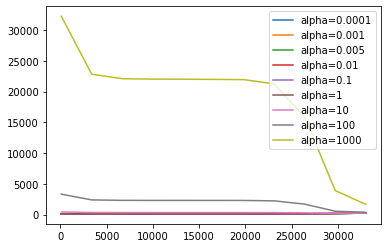

In [379]:
for i in [0.0001,0.001, 0.005, 0.01, 0.1, 1, 10, 100,1000]:
    loss_list = []
    for j in range(X_train_new.shape[1]):
        y_hat = np.dot(X_train_new,W_list_matrix[j].T)
        loss_value = np.sum((y_train - y_hat)**2) + i*np.dot(W_list_matrix[j],W_list_matrix[j].T)
        loss_list.append(loss_value/10000)
    print(loss_list[1:]) 
#     plt.figure(figsize=(10,4))
    plt.plot(m,loss_list,label=f"alpha={i}")
plt.legend()


In [352]:
c = np.dot(X_train_new,W_list_matrix[0].T)
c.shape

(353,)

In [338]:
W_list_matrix= np.array(W_list)
W_list_matrix.shape

(11, 11)